### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
from pandas.errors import SettingWithCopyWarning

#Note : warning messages has been suppressed
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4832,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),2h,Female,21,Single,...,1~3,4~8,1~3,never,1,1,0,0,1,0
6945,Home,Alone,Snowy,30,6PM,Coffee House,1d,Female,41,Married partner,...,1~3,gt8,4~8,less1,1,1,0,0,1,0
12520,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,never,1,0,0,0,1,1
5269,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,1d,Male,50plus,Married partner,...,4~8,1~3,4~8,less1,1,1,0,0,1,1
11241,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,36,Married partner,...,less1,less1,less1,less1,1,1,0,0,1,0
11872,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Female,21,Married partner,...,1~3,4~8,1~3,never,1,0,0,0,1,0
2075,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,36,Divorced,...,gt8,gt8,gt8,1~3,1,1,0,0,1,1
9135,Work,Alone,Sunny,80,7AM,Coffee House,1d,Female,21,Married partner,...,gt8,4~8,1~3,1~3,1,0,0,1,0,1
8857,Home,Kid(s),Sunny,30,6PM,Bar,2h,Male,26,Married partner,...,1~3,1~3,1~3,1~3,1,1,0,0,1,1
11694,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,50plus,Married partner,...,gt8,4~8,1~3,less1,1,1,0,0,1,0


In [ ]:
data[['has_children', 'education', 'occupation', 'income','car','Bar']].sample(10)

,has_children,education,occupation,income,car,Bar
3939,1,Bachelors degree,Computer & Mathematical,$25000 - $37499,NaN,less1
4602,0,Graduate degree (Masters or Doctorate),Education&Training&Library,$100000 or More,NaN,never
3509,1,Some college - no degree,Protective Service,$25000 - $37499,NaN,less1
47,0,Some college - no degree,Student,$12500 - $24999,NaN,never
4335,1,Bachelors degree,Sales & Related,$37500 - $49999,NaN,1~3
3426,0,Associates degree,Office & Administrative Support,$37500 - $49999,NaN,4~8
3025,1,Some college - no degree,Food Preparation & Serving Related,$12500 - $24999,NaN,1~3
1696,0,Bachelors degree,Management,$100000 or More,NaN,never
5924,0,Some college - no degree,Student,Less than $12500,NaN,gt8
191,1,Associates degree,Healthcare Practitioners & Technical,$25000 - $37499,NaN,never


In [ ]:
data.shape

(12684, 26)

In [ ]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [ ]:
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [ ]:
data.isna().mean().mul(100).sort_values(ascending=False)

,0
car,99.148534
CoffeeHouse,1.710817
Restaurant20To50,1.490066
CarryAway,1.190476
RestaurantLessThan20,1.024913
Bar,0.843582
weather,0.000000
temperature,0.000000
destination,0.000000
passanger,0.000000


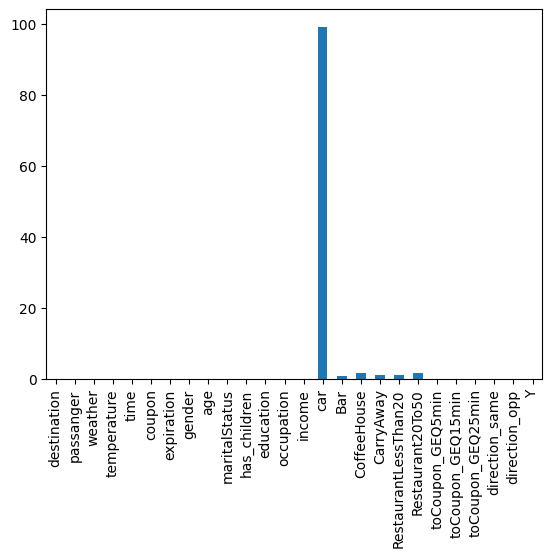

In [ ]:
data.isna().mean().mul(100).plot(kind='bar');

OBSERVATION

Most of the values in the car has NaN values, Other columns like Bar, Coffeehouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 has around 1% percentage of null values. So ignoring those values


In [ ]:
data['car'].value_counts()

,count
car,
Scooter and motorcycle,22
Mazda5,22
do not drive,22
crossover,21
Car that is too old to install Onstar :D,21


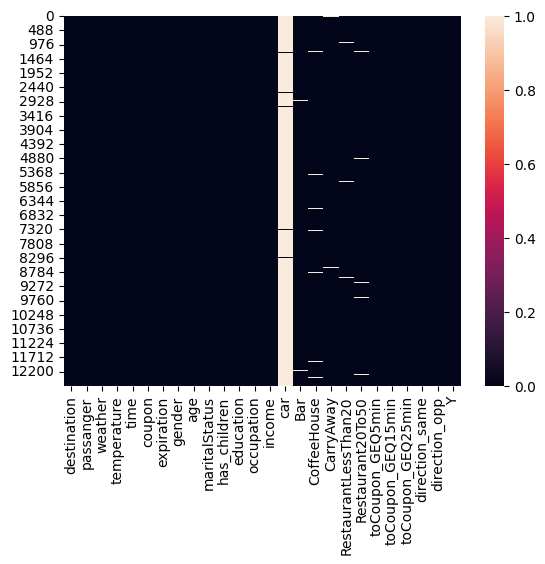

In [ ]:
sns.heatmap(data.isna());

In [ ]:
data.duplicated().sum()


np.int64(74)

OBSERVATION:  There is no duplicates as per above results


In [ ]:
data.nunique()

,0
destination,3
passanger,4
weather,3
temperature,3
time,5
coupon,5
expiration,2
gender,2
age,8
maritalStatus,5


3. Decide what to do about your missing data -- drop, replace, other...

Based on the correlation between Car, Bar, Coffeehouse, CarryAway, RestaurantLessThan20 and Restaurant20To50  Vs 'Y' column, We need to decide whether we need to keep this column or replace the values.  I will find out in the data Exploration step and decide

4. What proportion of the total observations chose to accept the coupon?



In [ ]:
data['Y'].describe()

,Y
count,12684.000000
mean,0.568433
std,0.495314
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
print((data['Y'].value_counts()/data.shape[0]).mul(100))

Y
1    56.843267
0    43.156733
Name: count, dtype: float64


56.85% of total objertvatsions accepted the coupons and 43% didnt accept it

5. Use a bar plot to visualize the `coupon` column.

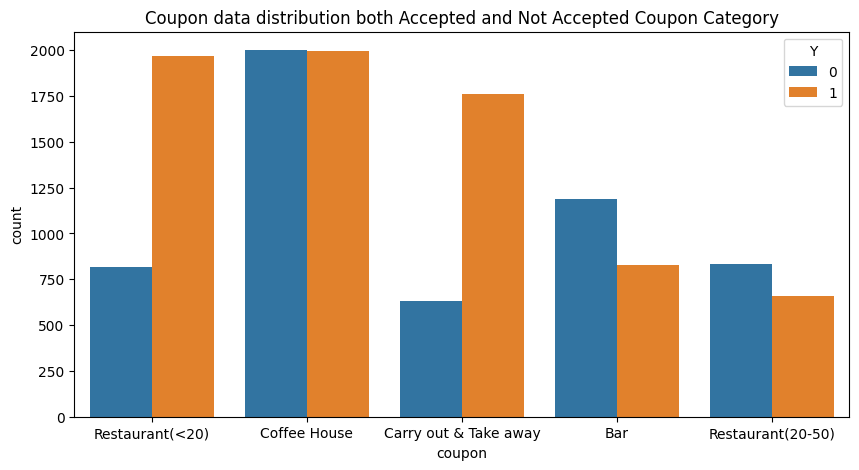

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='coupon', data=data, hue='Y')
plt.title('Coupon data distribution both Accepted and Not Accepted Coupon Category')
plt.show()


In [ ]:
restaurant_ln_20_ratio = (data.query('coupon=="Restaurant(<20)" & Y==1').shape[0])/(data.query('coupon=="Restaurant(<20)"').shape[0])*100
print(restaurant_ln_20_ratio)
restaurant_ln_20_ratio = (data.query('coupon=="Carry out & Take away" & Y==1').shape[0])/(data.query('coupon=="Carry out & Take away"').shape[0])*100
print(restaurant_ln_20_ratio)

70.71069633883704
73.54784788967822


Key take aways from the the above Bar plot are,
*. Carry out & take away and Restarurant(<20) coupons are accepted by more than 70% of people out of total Restaurant(<20) and Carry out & Take Away coupons

*. Coffee House coupons acceptance rate are almost 50%

*. Bar and Restuarant(20-50) coupons got less acceptance compare to acceptance rate

6. Use a histogram to visualize the temperature column.

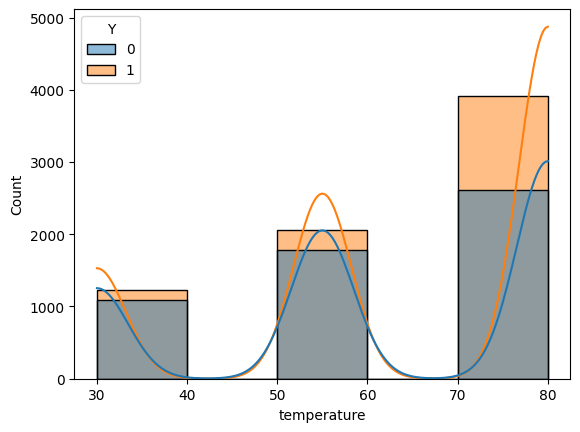

In [ ]:
sns.histplot(data=data, x='temperature', kde=True, hue='Y', bins=5)
plt.show()


Based on the above plot, there are only 3 kind of temperature, for each case got more acceptance rate compare to not accepted case.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
bar_df = data.query('coupon=="Bar"')
bar_df['Bar'] = bar_df['Bar'].map({'never':0, 'less1':1, '1~3':2, '4~8':3, 'gt8':4});
#bar_df['age'] = bar_df['age'].astype('int')
bar_df['age'] = bar_df['age'].map({'below21':0, '21':1, '26':2, '31':3, '36':4,'41':5,'46':6,'50plus':7});
bar_df['maritalStatus'] = bar_df['maritalStatus'].map({'Married partner':0, 'Single':1, 'Unmarried partner':2, 'Divorced':3, 'Widowed':4});
bar_df['RestaurantLessThan20'] = bar_df['RestaurantLessThan20'].map({'never':0, 'less1':1, '1~3':2, '4~8':3, 'gt8':4});
bar_df['income'] = bar_df['income'].map({'Less than $12500':0, '$12500 - $24999':1, '$25000 - $37499':2, '$37500 - $49999':3, '$50000 - $62499':4,'$62500 - $74999':5,'$75000 - $87499':6,'$87500 - $99999':7,'$100000 or More':8});


2. What proportion of bar coupons were accepted?


In [ ]:
bar_ratio = (bar_df.query('Y==1').shape[0])/(bar_df.shape[0])*100
print(bar_ratio)

41.00148735746158


Only 41% of coupons were accepted out of total Bar coupons

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
bar_3_or_fewer_ratio = (bar_df.query('Y==1 and Bar==2').shape[0])/(bar_df.query('Y==1 and Bar >2').shape[0])*100
print(bar_3_or_fewer_ratio)

167.97385620915034


Acceptance rate for people went to bar 3 or fewer times is 167% compare to people who went more to the Bar

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
age_over_25_ratio = (bar_df.query('Y==1 and Bar>1 and age>=2').shape[0])/(bar_df.query('Y==1 and Bar >1').shape[0])*100
print(age_over_25_ratio)

print(bar_df.query('Y==1 and Bar>1 and age>=2').shape[0])
print(bar_df.query('Y==0 and Bar>1 and age>=2').shape[0])
print(292/(292+128))

71.21951219512195
292
128
0.6952380952380952


Acceptance rate for the people go to bar more than once a month and over the age of 25  to all others is 71%. Over 71% of people is falling this category.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
go_to_bar_ratio = (bar_df.query('Y==1 and Bar>1 and passanger !="Kid(s)"	').shape[0])/(bar_df.query('Y==1 and Bar >1 and occupation not in ["farming","fishing","forestry"] and passanger !="Kid(s)"').shape[0])*100
print(go_to_bar_ratio)

100.0


Here People doesnt have a Kid(s) passanger and their occupation is not in farming, fishing and forestry accepance rate is 100%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:


go_to_bar_not_kid_not_widow_ratio = (bar_df.query('Y==1 and Bar>1 and passanger !="Kid(s)"').shape[0])/(bar_df.query('Y==1 and Bar >1 and maritalStatus!=4 and passanger !="Kid(s)"').shape[0])*100
print("go_to_bar_not_kid_not_widow_ratio :", round(go_to_bar_not_kid_not_widow_ratio,2))

go_to_bar_under_ag_30 = (bar_df.query('Y==1 and Bar>1 and age<3').shape[0])/(bar_df.query('Y==1 and Bar >1').shape[0])*100
print("go_to_bar_under_ag_30 :", round(go_to_bar_under_ag_30,2))

go_to_cheap_restaurant_income_lt_50k = (bar_df.query('Y==1 and RestaurantLessThan20>2').shape[0])/(bar_df.query('Y==1 and RestaurantLessThan20>2 and income<4').shape[0])*100
print("go_to_cheap_restaurant_income_lt_50k", round(go_to_cheap_restaurant_income_lt_50k, 2))

go_to_bar_not_kid_not_widow_ratio : 100.0
go_to_bar_under_ag_30 : 60.73
go_to_cheap_restaurant_income_lt_50k 209.62


More than 70% of bar coupon acceptance rate for people
     *. Go to bar more than once a month
     *. not widowed
     *. no Kids passenger

More than 70% of bar coupon acceptance for people
     *. Go to bar more than once a month
     *. Age is under 30

Bar coupon acceptance is around 45% for people,
     *. Go to Restaurantlessthan20 for 4 times a month
     *. Income is less than 50k

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Following people are accepting the bar coupon 70% or more than 70% of the time,

*   Go to bars more than once a month, had passengers that were not a kid, and were not widowed
*  Go to bar more than once a month and Age is under 30
*  Go to bars more than once a month, had passengers that were not a kid
*  Go to a bar more than once a month and are over the age of 25

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# **EDA for the Restaurant(<20) Coupon Acceptance by the Passengers **

---



In [ ]:
restaurant_ln_20_df = data.query('coupon=="Restaurant(<20)"')

Converting the Categorical value to Numeric for analysis:

In [ ]:
restaurant_ln_20_df['RestaurantLessThan20'] = restaurant_ln_20_df['RestaurantLessThan20'].map({'never':0, 'less1':1, '1~3':2, '4~8':3, 'gt8':4});
restaurant_ln_20_df['Bar'] = restaurant_ln_20_df['Bar'].map({'never':0, 'less1':1, '1~3':2, '4~8':3, 'gt8':4});
restaurant_ln_20_df['age'] = restaurant_ln_20_df['age'].map({'below21':0, '21':1, '26':2, '31':3, '36':4,'41':5,'46':6,'50plus':7});
restaurant_ln_20_df['maritalStatus'] = restaurant_ln_20_df['maritalStatus'].map({'Married partner':0, 'Single':1, 'Unmarried partner':2, 'Divorced':3, 'Widowed':4});
restaurant_ln_20_df['income'] = restaurant_ln_20_df['income'].map({'Less than $12500':0, '$12500 - $24999':1, '$25000 - $37499':2, '$37500 - $49999':3, '$50000 - $62499':4,'$62500 - $74999':5,'$75000 - $87499':6,'$87500 - $99999':7,'$100000 or More':8});


# Overall Coupon Acceptance Rate for the Restaurant(<20) Coupon is

In [ ]:
restaurant_ln_20_ratio = (restaurant_ln_20_df.query('Y==1').shape[0])/(restaurant_ln_20_df.shape[0])*100
print(restaurant_ln_20_ratio)

70.71069633883704


# Correlation between Numerical values :

<Figure size 1000x800 with 0 Axes>

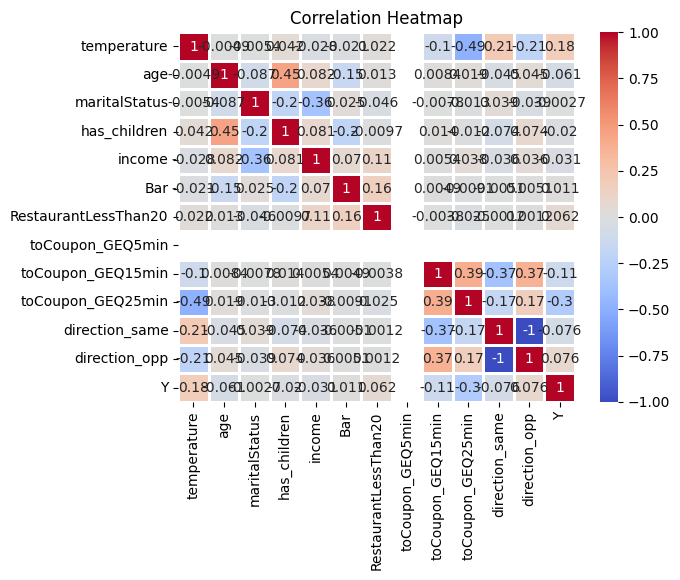

<Figure size 1000x800 with 0 Axes>

In [ ]:

corr_matrix = restaurant_ln_20_df.select_dtypes(include=np.number).corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1)

# Set the title and labels
plt.title('Correlation Heatmap')

plt.figure(figsize=(10, 8))

# Obesrvation : Based on the Heat map, there is no much correlation between variables, only few like has_children and age has slight impact.

# Numeric Relationships

In [ ]:
restaurant_ln_20_df.corr(numeric_only=True).round(3)['Y']

,Y
temperature,0.181
age,-0.061
maritalStatus,-0.003
has_children,-0.020
income,-0.031
Bar,0.011
RestaurantLessThan20,0.062
toCoupon_GEQ5min,NaN
toCoupon_GEQ15min,-0.113
toCoupon_GEQ25min,-0.296


# Categorical Relationships with Acceptance

In [ ]:
restnt_ln_20_df = data.query('coupon=="Restaurant(<20)"')
columns = restnt_ln_20_df.select_dtypes(['object']).columns.tolist()
for col in columns:
    display(restnt_ln_20_df.groupby(col)['Y'].agg(['mean', 'median', 'count']))

,mean,median,count
destination,,,
Home,0.555332,1.0,497
No Urgent Place,0.792541,1.0,1716
Work,0.582897,1.0,573


,mean,median,count
passanger,,,
Alone,0.638328,1.0,1435
Friend(s),0.801453,1.0,826
Kid(s),0.722846,1.0,267
Partner,0.771318,1.0,258


,mean,median,count
weather,,,
Rainy,0.388235,0.0,170
Snowy,0.486702,0.0,376
Sunny,0.768304,1.0,2240


,mean,median,count
time,,,
10AM,0.709571,1.0,303
10PM,0.505376,1.0,465
2PM,0.813486,1.0,697
6PM,0.827540,1.0,748
7AM,0.582897,1.0,573


,mean,median,count
coupon,,,
Restaurant(<20),0.707107,1.0,2786


,mean,median,count
expiration,,,
1d,0.831610,1.0,1354
2h,0.589385,1.0,1432


,mean,median,count
gender,,,
Female,0.696692,1.0,1421
Male,0.717949,1.0,1365


,mean,median,count
age,,,
21,0.741652,1.0,569
26,0.730838,1.0,561
31,0.705357,1.0,448
36,0.651877,1.0,293
41,0.708502,1.0,247
46,0.756757,1.0,148
50plus,0.637755,1.0,392
below21,0.734375,1.0,128


,mean,median,count
maritalStatus,,,
Divorced,0.633333,1.0,120
Married partner,0.689902,1.0,1119
Single,0.729885,1.0,1044
Unmarried partner,0.725738,1.0,474
Widowed,0.551724,1.0,29


,mean,median,count
education,,,
Associates degree,0.649789,1.0,237
Bachelors degree,0.727655,1.0,951
Graduate degree (Masters or Doctorate),0.608076,1.0,421
High School Graduate,0.715026,1.0,193
Some High School,0.722222,1.0,18
Some college - no degree,0.742236,1.0,966


,mean,median,count
occupation,,,
Architecture & Engineering,0.794872,1.0,39
Arts Design Entertainment Sports & Media,0.647059,1.0,136
Building & Grounds Cleaning & Maintenance,0.400000,0.0,10
Business & Financial,0.677165,1.0,127
Community & Social Services,0.700000,1.0,50
Computer & Mathematical,0.706667,1.0,300
Construction & Extraction,0.885714,1.0,35
Education&Training&Library,0.692308,1.0,221
Farming Fishing & Forestry,0.571429,1.0,7


,mean,median,count
income,,,
$100000 or More,0.717678,1.0,379
$12500 - $24999,0.685000,1.0,400
$25000 - $37499,0.753363,1.0,446
$37500 - $49999,0.681818,1.0,396
$50000 - $62499,0.782486,1.0,354
$62500 - $74999,0.696809,1.0,188
$75000 - $87499,0.661458,1.0,192
$87500 - $99999,0.577889,1.0,199
Less than $12500,0.724138,1.0,232


,mean,median,count
car,,,
Car that is too old to install Onstar :D,1.0,1.0,5
Mazda5,1.0,1.0,6
Scooter and motorcycle,1.0,1.0,4
crossover,0.2,0.0,5
do not drive,0.4,0.0,5


,mean,median,count
Bar,,,
1~3,0.729391,1.0,558
4~8,0.743697,1.0,238
gt8,0.658228,1.0,79
less1,0.681462,1.0,766
never,0.710339,1.0,1122


,mean,median,count
CoffeeHouse,,,
1~3,0.768908,1.0,714
4~8,0.720930,1.0,387
gt8,0.629032,1.0,248
less1,0.687415,1.0,739
never,0.683564,1.0,651


,mean,median,count
CarryAway,,,
1~3,0.731898,1.0,1022
4~8,0.721639,1.0,952
gt8,0.698551,1.0,345
less1,0.611529,1.0,399
never,0.764706,1.0,34


,mean,median,count
RestaurantLessThan20,,,
1~3,0.702679,1.0,1157
4~8,0.717500,1.0,800
gt8,0.760417,1.0,288
less1,0.673913,1.0,460
never,0.555556,1.0,54


,mean,median,count
Restaurant20To50,,,
1~3,0.751420,1.0,704
4~8,0.693642,1.0,173
gt8,0.694915,1.0,59
less1,0.691904,1.0,1334
never,0.684989,1.0,473


# Bar plot for Time vs Acceptance

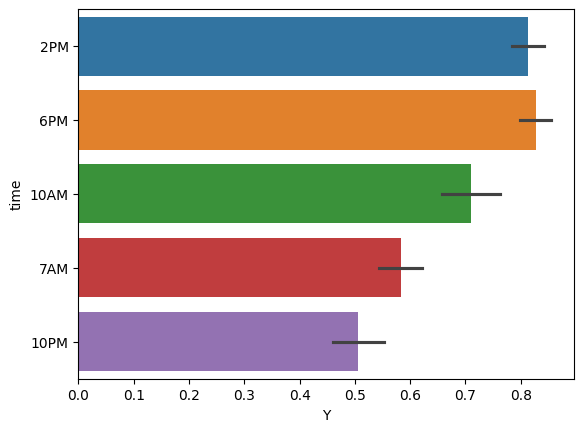

In [ ]:
sns.barplot(data=restnt_ln_20_df, y='time',x='Y', hue='time')
plt.show()

# Observation : 2pm and 6pm has more acceptance.

# Bar plot for Passenger vs Acceptance

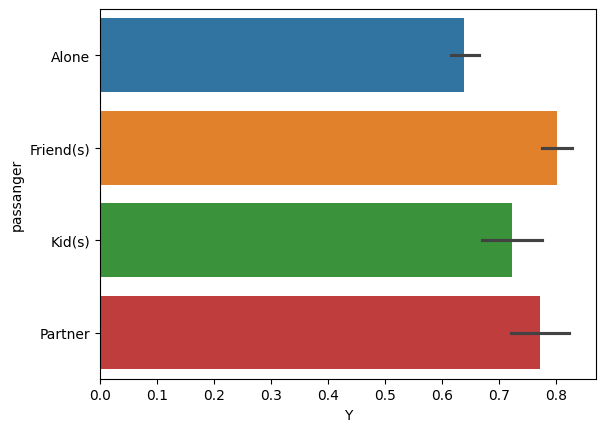

In [ ]:
sns.barplot(data=restnt_ln_20_df, y='passanger',x='Y', hue='passanger')
plt.show()

Observation : Driver with some passengers got more acceptance

# Bar plot for Age vs Acceptance

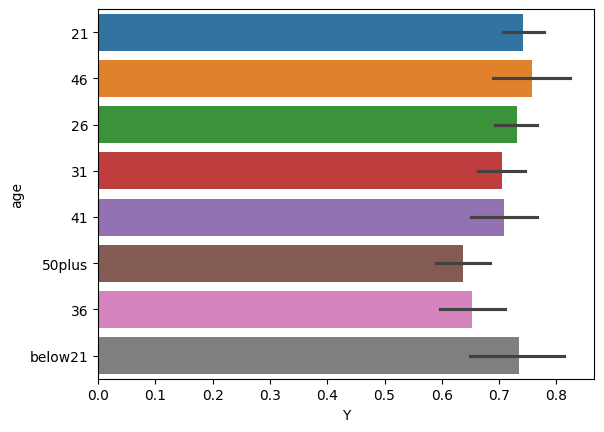

In [ ]:
sns.barplot(data=restnt_ln_20_df, y='age',x='Y', hue='age')
plt.show()

Observation : Acceptance is distributed acress different age group, not much difference

# Bar plot for maritalStatus vs Acceptance

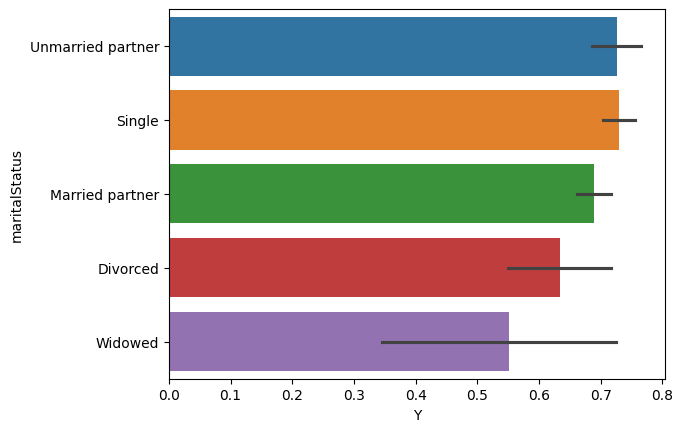

In [ ]:
sns.barplot(data=restnt_ln_20_df, y='maritalStatus',x='Y', hue='maritalStatus')
plt.show()

Observation : If maritalStatus is not widowed to more acceptance.

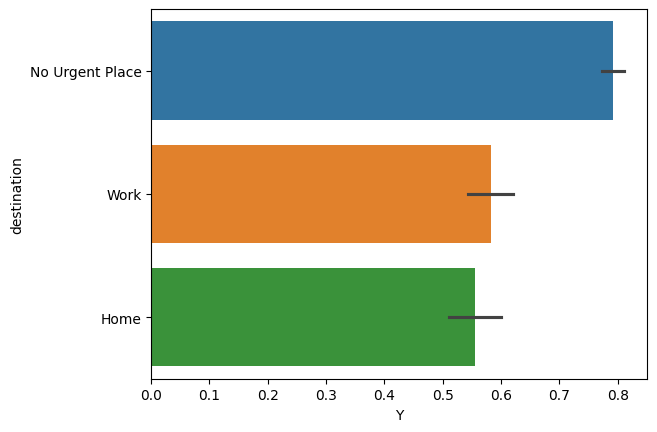

In [ ]:
sns.barplot(data=restnt_ln_20_df, y='destination',x='Y', hue='destination')
plt.show()

# Exploration based on the Numerical and Categorical value comparision from the above Plots and statistical data,

In [ ]:
#Passengers are not kids and going to RestaurantLessThan20 more than onece a month
nokids_and_morethan_1_restnt_with_accepted =restaurant_ln_20_df.query('Y==1 & RestaurantLessThan20>1 and passanger !="Kid(s)"').shape[0]
nokids_and_morethan_1_restnt_with_not_accepted = restaurant_ln_20_df.query('Y==0 & RestaurantLessThan20>1 and passanger !="Kid(s)"').shape[0]
acceptance_rate_nokids_and_morethan_1_restnt = (nokids_and_morethan_1_restnt_with_accepted)/(nokids_and_morethan_1_restnt_with_accepted+nokids_and_morethan_1_restnt_with_not_accepted)*100
print(acceptance_rate_nokids_and_morethan_1_restnt)

#MaritalStatus is single and going to RestaurantLessThan20 more than onece a month
single_and_morethan_1_restnt_with_accepted =restaurant_ln_20_df.query('Y==1 & RestaurantLessThan20>1 and maritalStatus==1').shape[0]
single_and_morethan_1_restnt_with_not_accepted = restaurant_ln_20_df.query('Y==0 & RestaurantLessThan20>1 and maritalStatus==1').shape[0]
acceptance_rate_single_and_morethan_1_restnt = (single_and_morethan_1_restnt_with_accepted)/(single_and_morethan_1_restnt_with_accepted+single_and_morethan_1_restnt_with_not_accepted)*100
print(acceptance_rate_single_and_morethan_1_restnt)

#Passengers are not kids, destination is No Urget Place, weather is Sunny and going to RestaurantLessThan20 more than onece a month
Nokid_Nourgentplace_suny_morethan_1_restnt_with_accepted =restaurant_ln_20_df.query('Y==1 & RestaurantLessThan20>1 and passanger !="Kid(s)" & destination=="No Urgent Place" & weather=="Sunny" ').shape[0]
Nokid_Nourgentplace_suny_morethan_1_restnt_with_not_accepted = restaurant_ln_20_df.query('Y==0 & RestaurantLessThan20>1 and passanger !="Kid(s)" & destination=="No Urgent Place" & weather=="Sunny"').shape[0]
acceptance_rate_Nokid_Nourgentplace_suny_morethan_1_restnt = (Nokid_Nourgentplace_suny_morethan_1_restnt_with_accepted)/(Nokid_Nourgentplace_suny_morethan_1_restnt_with_accepted+Nokid_Nourgentplace_suny_morethan_1_restnt_with_not_accepted)*100
print(acceptance_rate_Nokid_Nourgentplace_suny_morethan_1_restnt)

71.35135135135135
74.0880503144654
82.82329713721619


In [ ]:
homedestn_few_restnt_with_accepted =restaurant_ln_20_df.query('Y==1 & RestaurantLessThan20<1 and destination =="Home"').shape[0]
homedestn_few_restnt_with_not_accepted = restaurant_ln_20_df.query('Y==0 & RestaurantLessThan20<1 and destination=="Home"').shape[0]
not_acceptance_rate_homedestn_few_restnt = (homedestn_few_restnt_with_not_accepted)/(homedestn_few_restnt_with_accepted+homedestn_few_restnt_with_not_accepted)*100
print(not_acceptance_rate_homedestn_few_restnt)

time10pm_alone_lessthan_1_restnt_with_accepted =restaurant_ln_20_df.query('Y==1 & RestaurantLessThan20<1 and time =="10PM" and passanger=="Alone"').shape[0]
time10pm_alone_lessthan_1_restnt_with_not_accepted = restaurant_ln_20_df.query('Y==0 & RestaurantLessThan20<1 and time =="10PM" and passanger=="Alone"').shape[0]
not_acceptance_rate_10pm_alone_lessthan_1_restnt = (time10pm_alone_lessthan_1_restnt_with_not_accepted)/(time10pm_alone_lessthan_1_restnt_with_accepted+time10pm_alone_lessthan_1_restnt_with_not_accepted)*100
print(not_acceptance_rate_10pm_alone_lessthan_1_restnt)

45.36082474226804
57.14285714285714


# Observation for  Restaurant(<20) Coupon Acceptance rate:

Based on the analyis for the Numerical and Categorial relationship with the Coupon Accepance, following are the information has been derived,  


*  Restaurant(<20) Coupon Acceptance rate is 71% for the following data points,
1. People go to RestaurantLessThan20 more than one time in a month
2. Passangers are not kids

*  Restaurant(<20) Coupon Acceptance rate is 74% for the following data points together,
1. People go to RestaurantLessThan20 more than one time in a month
2. maritalStatus is single

*  Restaurant(<20) Coupon Acceptance rate is 83% for the following data points together,
    
1. People go to RestaurantLessThan20 more than one time in a month
2. Passangers are not kids
3. Destination is 'No Urgent place'
4. Weather is 'Sunny'






### Observation for  Restaurant(<20) Coupon not accepted rate:



* Coupon Not Acceptance rate is 66% for the following data points,
1. People never go to RestaurantLessThan20 in a month period
2. Driving destination is Home

*  Coupon Not Acceptance rate is 57% for the following data points,
1. People never go to RestaurantLessThan20 in a month period
2. Driving alone and travel time is 10PM




# Recommendations :

Based on the analysis of the Restaurant(<20) Coupon has more acceptance compare to other coupon types and Coffee house coupons has equal rate for Accepted and not Accepted case.